# Lab 7.2 Supplement: ETS and ARIMA

## Modeling Monthly Birth Data   

...continuing from yesterday's lab....

In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

birth = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt')
birth['dates'] = pd.date_range('1/1/1980','12/31/2010', freq='M')
birth['time'] = range(1,373)
birth['month'] = pd.DatetimeIndex(birth['dates']).month
birth['year'] = pd.DatetimeIndex(birth['dates']).year
birth = birth.set_index(birth['dates'])
birth.head()

Populating the interactive namespace from numpy and matplotlib


,num_births,dates,time,month,year
dates,,,,,
1980-01-31,295,1980-01-31,1,1,1980
1980-02-29,286,1980-02-29,2,2,1980
1980-03-31,300,1980-03-31,3,3,1980
1980-04-30,278,1980-04-30,4,4,1980
1980-05-31,272,1980-05-31,5,5,1980


11) Use time series regression methods to fit a model. Using `OLS` in `statsmodels`, fit the overall trend with increasing polynomial terms. 
    - You will need to take your `time` variable and create `time^2, time^3
    time^4, time^5`
    - Increase model complexity by adding a higher order term
        - Examine the summary information and compare each model to the 
          model before it (i.e. simple linear with `time` compared to 2nd order
          polynomial with `time` + `time^2`) by examining AIC/BIC.
        - Superimpose (by plotting) the fitted onto the original data and predict
          the values for 2011
        - Keep increasing until general trend has been captured 
          (You won't be able to capture the bump between 1999-2004 without a very 
          complicated model and there's no reason to assume that future values 
          wouldn't follow the more general trend) 

In [2]:
# This is an example of ETS.
birth['time_2'] = birth['time']**2
birth['time_3'] = birth['time']**3
birth['time_4'] = birth['time']**4
birth['time_5'] = birth['time']**5
birth.head()

,num_births,dates,time,month,year,time_2,time_3,time_4,time_5
dates,,,,,,,,,
1980-01-31,295,1980-01-31,1,1,1980,1,1,1,1
1980-02-29,286,1980-02-29,2,2,1980,4,8,16,32
1980-03-31,300,1980-03-31,3,3,1980,9,27,81,243
1980-04-30,278,1980-04-30,4,4,1980,16,64,256,1024
1980-05-31,272,1980-05-31,5,5,1980,25,125,625,3125


#### Model with up to 5th power:

In [3]:
X_5 = birth[['time','time_2','time_3','time_4','time_5']]
X_5 = sm.add_constant(X_5)
y_5 = birth['num_births']

model_5 = sm.OLS(y_5, X_5)
results_5 = model_5.fit()
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     199.7
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          3.00e-102
Time:                        14:13:43   Log-Likelihood:                -1606.8
No. Observations:                 372   AIC:                             3226.
Df Residuals:                     366   BIC:                             3249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        290.4529      5.839     49.744      0.000     278.971     301.935
time           0.0144      0.315      0.046      0.964      -0.605       0.633
time_2         0.0150      0.005      2.881      0.004       0.005       0.025
time_3        -0.0001   3.54e-05     -3.615      0.000      -0.000   -5.83e-05
time_4      3.495e-07   1.05e-07      3.344      0.001    1.44e-07    5.55e-07
time_5     -3.092e-10   1.12e-10     -2.773      0.006   -5.29e-10   -8.99e-11
==============================================================================
Omnibus:                        4.631   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.607
Skew:                           0.124   Prob(JB):                        0.165
Kurtosis:                       2.587   Cond. No.                     1.33e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

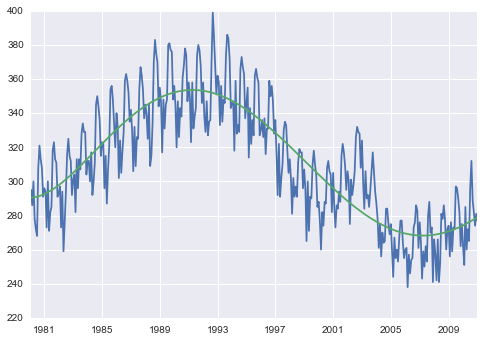

In [4]:
plt.plot(birth['dates'],birth['num_births'])
plt.plot(birth['dates'],results_5.fittedvalues);

In [5]:
birth.tail()

,num_births,dates,time,month,year,time_2,time_3,time_4,time_5
dates,,,,,,,,,
2010-08-31,289,2010-08-31,368,8,2010,135424,49836032,18339659776,6748994797568
2010-09-30,282,2010-09-30,369,9,2010,136161,50243409,18539817921,6841192812849
2010-10-31,274,2010-10-31,370,10,2010,136900,50653000,18741610000,6934395700000
2010-11-30,281,2010-11-30,371,11,2010,137641,51064811,18945044881,7028611650851
2010-12-31,277,2010-12-31,372,12,2010,138384,51478848,19150131456,7123848901632


#### Prediction for 2011. The last time period in our dataframe is 372, which corresponds to December 31, 2010. So 2011, in fact, January 1, 2011, will be 373.

In [6]:
time = 373
prediction_2011 = 290.4529 + 0.0144 * time + 0.0150 * time - 0.0001 * time + 3.495e-07 * time - 3.092e-10 * time
prediction_2011

301.3819302481684

In [7]:
results_5.predict([1,time,time**2,time**3,time**4,time**5])

array([ 279.34288128])

#### Model with up to 4th power:

In [8]:
X = birth[['time','time_2','time_3','time_4']]
X = sm.add_constant(X)
y = birth['num_births']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          8.01e-102
Time:                        14:13:43   Log-Likelihood:                -1610.7
No. Observations:                 372   AIC:                             3231.
Df Residuals:                     367   BIC:                             3251.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.3532      4.873     57.733      0.000     271.770     290.936
time           0.7327      0.181      4.059      0.000       0.378       1.088
time_2         0.0016      0.002      0.821      0.412      -0.002       0.005
time_3     -3.224e-05   7.91e-06     -4.077      0.000   -4.78e-05   -1.67e-05
time_4       6.11e-08   1.05e-08      5.810      0.000    4.04e-08    8.18e-08
==============================================================================
Omnibus:                        3.293   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.683
Skew:                           0.092   Prob(JB):                        0.261
Kurtosis:                       2.627   Cond. No.                     3.27e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model with up to 3rd power:

In [9]:
X = birth[['time','time_2','time_3']]
X = sm.add_constant(X)
y = birth['num_births']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     287.6
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.31e-96
Time:                        14:13:43   Log-Likelihood:                -1627.0
No. Observations:                 372   AIC:                             3262.
Df Residuals:                     368   BIC:                             3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        264.1834      4.044     65.332      0.000     256.232     272.135
time           1.6424      0.094     17.517      0.000       1.458       1.827
time_2        -0.0093      0.001    -15.981      0.000      -0.010      -0.008
time_3      1.334e-05   1.03e-06     12.968      0.000    1.13e-05    1.54e-05
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.070
Skew:                           0.106   Prob(JB):                        0.215
Kurtosis:                       2.609   Cond. No.                     7.90e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model with up to 2nd power:

In [10]:
X = birth[['time','time_2']]
X = sm.add_constant(X)
y = birth['num_births']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.62e-67
Time:                        14:13:43   Log-Likelihood:                -1697.0
No. Observations:                 372   AIC:                             3400.
Df Residuals:                     369   BIC:                             3412.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        299.0767      3.639     82.198      0.000     291.922     306.232
time           0.5273      0.045     11.705      0.000       0.439       0.616
time_2        -0.0019      0.000    -15.941      0.000      -0.002      -0.002
==============================================================================
Omnibus:                        5.782   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.168
Skew:                           0.222   Prob(JB):                       0.0755
Kurtosis:                       2.630   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model with just 'time':

In [11]:
X = birth[['time']]
X = sm.add_constant(X)
y = birth['num_births']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.72e-26
Time:                        14:13:43   Log-Likelihood:                -1794.5
No. Observations:                 372   AIC:                             3593.
Df Residuals:                     370   BIC:                             3601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.4232      3.137    109.148      0.000     336.254     348.592
time          -0.1681      0.015    -11.531      0.000      -0.197      -0.139
==============================================================================
Omnibus:                        3.968   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.093
Skew:                           0.099   Prob(JB):                        0.213
Kurtosis:                       2.600   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that AIC/BIC goes up as we remove polynomial terms.

12) Now that you have fit trend, add in the monthly component via dummy variables to capture seasonality.  You could  also try to create a 'seasons of the year' variable and fit the quarterly time series instead of the original monthly time you plotted earlier...opportunity to play around.

In [12]:
X_month = birth[['time','time_2','time_3','time_4','time_5','month']]
X_month = sm.add_constant(X_month)
y_month = birth['num_births']

model_month = sm.OLS(y_month, X_month)
results_month = model_month.fit()
results_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          3.21e-118
Time:                        14:13:43   Log-Likelihood:                -1566.4
No. Observations:                 372   AIC:                             3147.
Df Residuals:                     365   BIC:                             3174.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.4908      5.398     51.595      0.000     267.876     289.105
time          -0.1563      0.283     -0.552      0.582      -0.714       0.401
time_2         0.0178      0.005      3.784      0.000       0.009       0.027
time_3        -0.0001   3.18e-05     -4.591      0.000      -0.000   -8.36e-05
time_4      4.034e-07   9.41e-08      4.288      0.000    2.18e-07    5.88e-07
time_5      -3.67e-10      1e-10     -3.657      0.000   -5.64e-10    -1.7e-10
month          2.3348      0.248      9.406      0.000       1.847       2.823
==============================================================================
Omnibus:                       13.207   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.232
Skew:                           0.211   Prob(JB):                       0.0163
Kurtosis:                       2.406   Cond. No.                     1.37e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

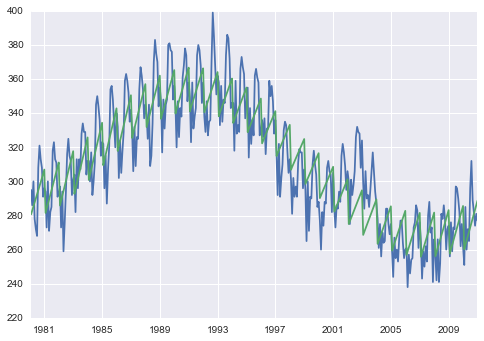

In [13]:
plt.plot(birth['dates'],birth['num_births'])
plt.plot(birth['dates'],results_month.fittedvalues);

We can see that the model/plot is much better.

13) Plot the `dates` variable (`x`) against the residuals (`y`) of the final model (including the seasonality term).
    Is there an obvious pattern of the residuals with respect to time? If there is any autocorrelation left in the 
    model, there will be some pattern in your residual and we'll learn to address that in the afternoon.

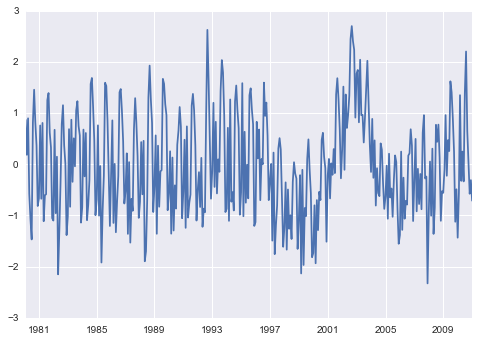

In [14]:
plt.plot(birth['dates'],results_month.resid_pearson);

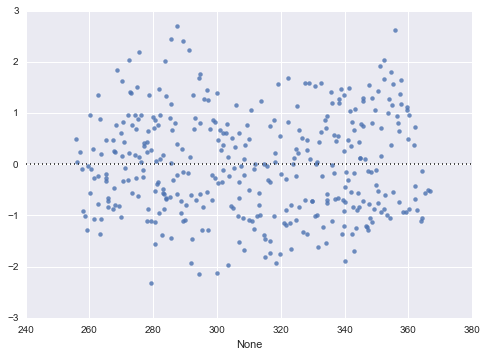

In [15]:
sns.residplot(results_month.fittedvalues, results_month.resid_pearson, birth);

The plot above is not too bad.

14) Fit a ARIMA or seasonal ARIMA model to the birth data.

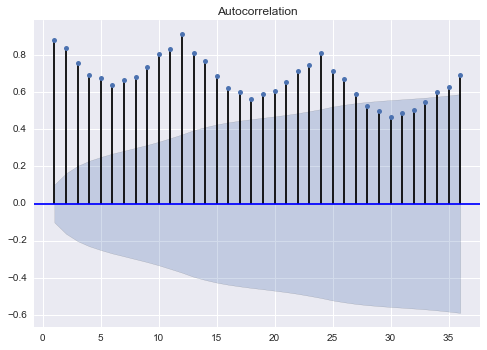

In [16]:
plot_acf(birth['num_births'], lags=36, zero=False);

The above plot gives a strong indication of non-stationary, which is not a good thing: it means that the mean $\mu$ is not the same for all $t$. In general, a stationary time series will have no predictable patterns in the long-term.

Non-stationary can be addressed by transformation, etc. (check DSCI6002-7.2-Lecture-suppl.ipynb for details). With non-stationary data we shouldn't build a model.

>ACF goes with AR models.

>PACF goes with MA models.

>PACF is preferred over ACF.

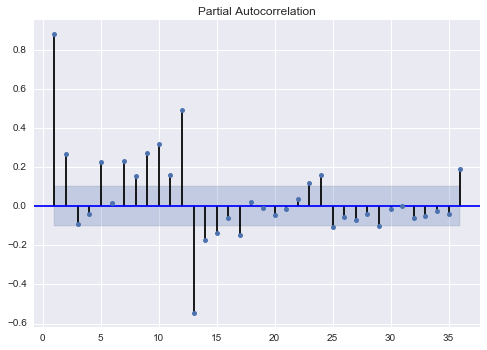

In [17]:
plot_pacf(birth['num_births'], lags=36, zero=False);

The pacf plot above also gives indication of non-stationary.

ARIMA has three order arguments: the first one **p**, is for **AR**, the second one **d**, is for **I**, the third one **q**, is for **MA**.

If **q = 0**, we have a **AR** model. We set **d = 0**.

If **p = 0**, we have a **MA** model. We set **d = 0**.

If **d = 0**, we have a **ARMA** model.

If **p $\neq$ 0**, **d $\neq$ 0** and **q $\neq$ 0**, we have an **ARIMA** model.

In [18]:
birth.head()

,num_births,dates,time,month,year,time_2,time_3,time_4,time_5
dates,,,,,,,,,
1980-01-31,295,1980-01-31,1,1,1980,1,1,1,1
1980-02-29,286,1980-02-29,2,2,1980,4,8,16,32
1980-03-31,300,1980-03-31,3,3,1980,9,27,81,243
1980-04-30,278,1980-04-30,4,4,1980,16,64,256,1024
1980-05-31,272,1980-05-31,5,5,1980,25,125,625,3125


In [19]:
# ARIMA needs to have the variable set to FLOAT.
model_ar = sm.tsa.ARIMA(birth['num_births'].astype(float), order=[2,0,0], freq='M')
model_ar.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             num_births   No. Observations:                  372
Model:                     ARMA(2, 0)   Log Likelihood               -1556.164
Method:                       css-mle   S.D. of innovations             15.833
Date:                Wed, 12 Oct 2016   AIC                           3120.329
Time:                        14:13:45   BIC                           3136.004
Sample:                    01-31-1980   HQIC                          3126.554
                         - 12-31-2010                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              309.3067      9.208     33.590      0.000     291.259     327.355
ar.L1.num_births     0.6432      0.050     12.921      0.000       0.546       0.741
ar.L2.num_births     0.2706      0.050      5.428      0.000       0.173       0.368
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0716           +0.0000j            1.0716            0.0000
AR.2           -3.4483           +0.0000j            3.4483            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
model_ma = sm.tsa.ARIMA(birth['num_births'].astype(float), order=(0,0,2))
model_ma.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             num_births   No. Observations:                  372
Model:                     ARMA(0, 2)   Log Likelihood               -1645.627
Method:                       css-mle   S.D. of innovations             20.121
Date:                Wed, 12 Oct 2016   AIC                           3299.255
Time:                        14:13:45   BIC                           3314.930
Sample:                    01-31-1980   HQIC                          3305.480
                         - 12-31-2010                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              310.9037      2.417    128.629      0.000     306.166     315.641
ma.L1.num_births     0.5095      0.028     18.048      0.000       0.454       0.565
ma.L2.num_births     0.8131      0.037     21.870      0.000       0.740       0.886
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.3133           -1.0638j            1.1090           -0.2956
MA.2           -0.3133           +1.0638j            1.1090            0.2956
-----------------------------------------------------------------------------
"""

In [21]:
model_arma = sm.tsa.ARIMA(birth['num_births'].astype(float), order=(2,0,2))
model_arma.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             num_births   No. Observations:                  372
Model:                     ARMA(2, 2)   Log Likelihood               -1553.206
Method:                       css-mle   S.D. of innovations             15.706
Date:                Wed, 12 Oct 2016   AIC                           3118.413
Time:                        14:13:45   BIC                           3141.926
Sample:                    01-31-1980   HQIC                          3127.751
                         - 12-31-2010                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              309.8068      7.932     39.059      0.000     294.261     325.353
ar.L1.num_births     0.6393      0.157      4.078      0.000       0.332       0.947
ar.L2.num_births     0.2399      0.148      1.623      0.105      -0.050       0.530
ma.L1.num_births     0.0385      0.153      0.252      0.801      -0.261       0.338
ma.L2.num_births     0.1662      0.073      2.282      0.023       0.023       0.309
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1055           +0.0000j            1.1055            0.0000
AR.2           -3.7701           +0.0000j            3.7701            0.5000
MA.1           -0.1158           -2.4504j            2.4532           -0.2575
MA.2           -0.1158           +2.4504j            2.4532            0.2575
-----------------------------------------------------------------------------
"""

In [22]:
model_arima = sm.tsa.ARIMA(birth['num_births'].astype(float), order=(2,1,2))
model_arima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.num_births   No. Observations:                  371
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1539.321
Method:                       css-mle   S.D. of innovations             15.321
Date:                Wed, 12 Oct 2016   AIC                           3090.642
Time:                        14:13:45   BIC                           3114.139
Sample:                    02-29-1980   HQIC                          3099.975
                         - 12-31-2010                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0487      0.167     -0.292      0.770      -0.375       0.278
ar.L1.D.num_births     0.1709      0.138      1.240      0.216      -0.099       0.441
ar.L2.D.num_births     0.3278      0.083      3.963      0.000       0.166       0.490
ma.L1.D.num_births    -0.6122      0.135     -4.529      0.000      -0.877      -0.347
ma.L2.D.num_births    -0.2857      0.121     -2.357      0.019      -0.523      -0.048
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5052           +0.0000j            1.5052            0.0000
AR.2           -2.0265           +0.0000j            2.0265            0.5000
MA.1            1.0845           +0.0000j            1.0845            0.0000
MA.2           -3.2270           +0.0000j            3.2270            0.5000
-----------------------------------------------------------------------------
"""